# **B-trees**

A B-tree is a balanced search tree where more than one item can be stored in every node.


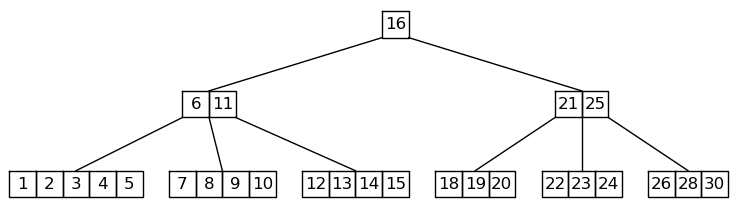

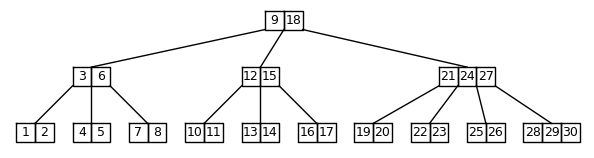

Charactersistics:


*   All leaves have the same depth, which is the height of the tree
*   Each tree has an associated constant m, which determines the number of keys its nodes may store
*   m is an odd integer greater or equal to 3
*   The root may have between 1 and m items
*   Nodes other than the root may have from m//2 to m items
*   Items are stored in sorted lists inside nodes
*   if an internal (non-leaf) node has n items, it has n+1 children
*   The items stored in a node split the ranges of the items stored in the subtrees of that node. If items k0,...,kn are stored in a node, all items stored in the first subtree of that node are less than k0, all items stored in the second subtree are greater than k0 and less than k1, and so on, as shown in the image.









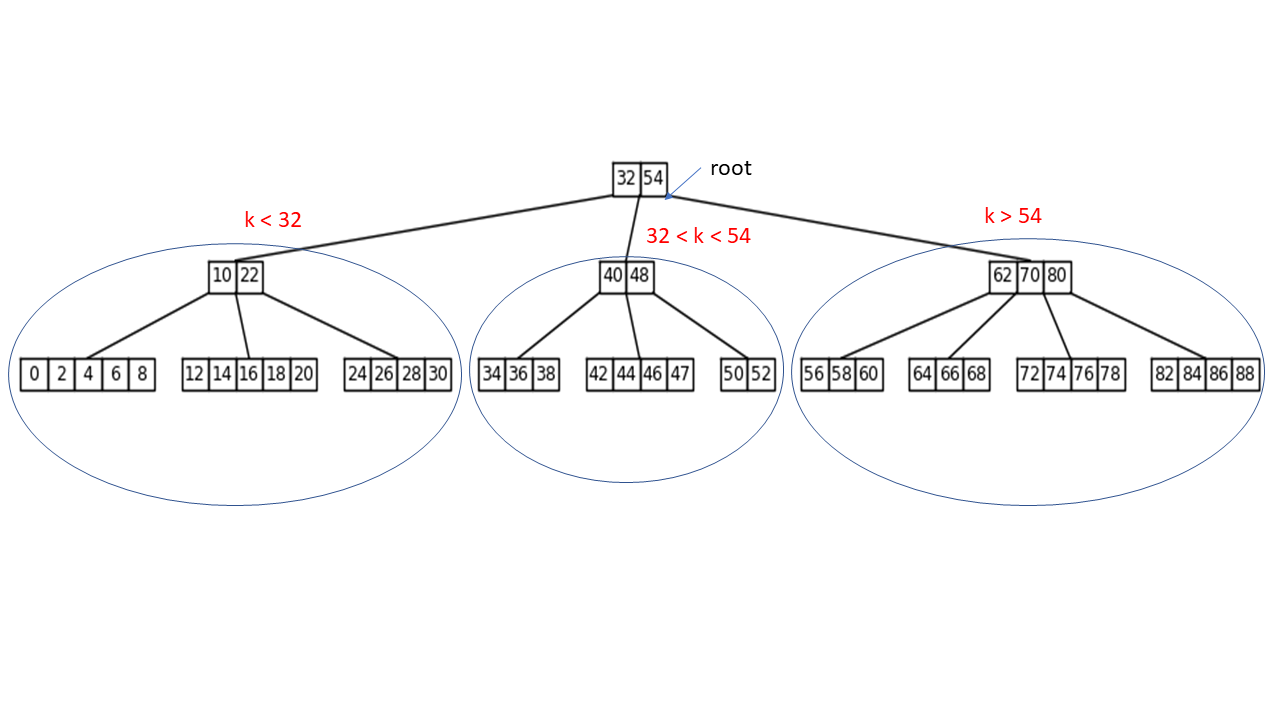

B-tree operations:
* BTree() - create an empty B-tree
* In_order() - print the keys in the tree in ascending order
* Insert(k) -  add key k to B-tree
* Delete(k) - delete key k from B-tree
* Find(k) - return the address of the node in the B-tree that contains key k, or return None if k is not in the tree 

##Implementation 

### BST Object definition

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BTree:
  
    def __init__(self,  max_items = 5, d = [],c = []):
        if max_items%2 ==0: # Make sure max_items is odd
            max_items +=1
        if max_items <3:    # Make sure max_items is  at least 3
            max_items=3

        self.data = d
        self.child = c
        self.max_items = max_items

Create an empty B-tree

In [ ]:
T = BTree()
print(T.data)

Building a B-tree:

*   We insert a new item by adding it to the data list in the appropriate node.
*   To insert a new item, we must ensure that the corresponding data list has less than the maximum number of items allowed (we will use 5 for all of our examples).

*   All insertions are performed in leaves, as in binary search trees.
*   During an insertion, if a full node is found in the path from the root to the appropriate leaf, we split it, promoting the median item (the item in the middle of the data list, data[max_items//2]) to the parent node.
*  When the root is split, its median becomes the only item in the new root, and the height of the tree is increased by one.

Note: A node is split if it's full before performing the insertion. If the insertion makes it full, we don't split it. 


The full implementation of insertion, drawing, and displaying the sturcture of the BTree is as follows. Make sure you understand the attributes stored in a node and how a B-tree is built. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BTree:

    # Constructor
    def __init__(self,  max_items = 5, d = [],c = []):
        if max_items%2 ==0: # Make sure max_items is odd
            max_items +=1
        if max_items <3:    # Make sure max_items is  at least 3
            max_items=3

        self.data = d
        self.child = c
        self.max_items = max_items

    def find_subtree(self, k):
        # Determines value of c, such that if i is in the BTree, it must be in subtree self.child[c]
        for c in range(len(self.data)):
            if self.data[c]>k:
                return c
        return len(self.data)

    def is_full(self):
        return len(self.data) >= self.max_items

    def insert(self, i, parent=None):
        if self.is_full():
            m, right_child = self.split()
            if parent==None: # Spliting the root
                left_child = BTree(self.max_items,self.data,self.child)
                self.data = [m]
                self.child = [left_child, right_child]
                if i<m:
                    left_child.insert(i,self)
                else:
                    right_child.insert(i,self)
            else: # Splitting non-root node
                k = parent.find_subtree(i)
                parent.data = parent.data[:k]+[m]+parent.data[k:]
                parent.child = parent.child[:k+1]+[right_child]+parent.child[k+1:]
                if i<m:
                    self.insert(i,parent)
                else:
                    right_child.insert(i,parent)
        else: # Node is not full; no need to split it
            k = self.find_subtree(i)
            if len(self.child)==0: # If node is a leaf, insert new item here
                self.data = self.data[:k]+[i]+self.data[k:]
            else:
                self.child[k].insert(i,self) # Insert in appropriate subtree

    def split(self):
        mid = self.max_items // 2
        m = self.data[mid]
        right_side = BTree(self.max_items,self.data[mid + 1:],self.child[mid + 1:])
        self.data = self.data[:mid]
        self.child = self.child[:mid+1]
        return m, right_side

    def _leaves(self):
        if len(self.child)==0:
            return [self.data]
        s = []
        for c in self.child:
            s = s + c._leaves()
        return s

    def _set_x(self, dx):
        if len(self.child)>0:
            for c in self.child:
                c._set_x(dx)
            d = (dx[self.child[0].data[0]] + dx[self.child[-1].data[0]] + 10 * len(self.child[-1].data)) / 2
            dx[self.data[0]] = d - 10 * len(self.data) / 2

    def draw_(self, dx, y, y_inc, fs, ax):
        # Function to display b-tree to the screen
        # It works fine for trees with up to about 70 data items
        xs = dx[self.data[0]]
        if len(self.child)==0:
            for itm in self.data:
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(itm), ha="center", va="center", fontsize=fs)
                xs += 10
        else:
            for i,d in enumerate(self.data):
                xc = dx[self.child[i].data[0]] + 5 * len(self.child[i].data)
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(d), ha="center", va="center", fontsize=fs)
                ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
                self.child[i].draw_(dx, y - y_inc, y_inc, fs, ax)
                xs += 10
            xc = dx[self.child[-1].data[0]] + 5 * len(self.child[-1].data)
            ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
            self.child[-1].draw_(dx, y - y_inc, y_inc, fs, ax)

    def draw(self,title=''):
        # Find x-coordinates of leaves
        ll = self._leaves()
        dx = {}
        d = 0
        for l in ll:
            dx[l[0]] = d
            d += 10 * (len(l) + 1)
            # Find x-coordinates of internal nodes
        self._set_x(dx)
        # plt.close('all')
        fig, ax = plt.subplots(figsize=(8,3))
        self.draw_(dx, 0, 30, 9, ax)
        ax.set_aspect(1.0)
        ax.axis('off')
        fig.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.show()

    def print_tree(self,space=''):
        print(space,self.data)
        for c in self.child:
            c.print_tree(space+'  ')

Let's see how a BTree is built.


In [ ]:
A =[8, 11, 6, 7, 16, 2,15, 1, 9, 4, 14,  13, 5,3,10,12,17]
T = BTree(5)

for a in A:
    T.insert(a)
    T.draw('After inserting '+str(a))


T.print_tree()

T.draw()


In [ ]:
T.draw()

In [ ]:
print(T)

Can you figure out the values of the following variables?

*   T.data
*   T.data[1]
*   len(T.data)
*   T.max_items
*   T.child
*   len(T.child)


*   T.child[2].data[3]


*   T.child[-1].max_items





In [ ]:
T.data

In [ ]:
T.data[1]

In [ ]:
len(T.data)

In [ ]:
T.max_items

In [ ]:
T.child

In [ ]:
len(T.child)

In [ ]:
T.child[2].data[3]

In [ ]:
T.child[-1].max_items

Now let's build and draw some randomly-generated BTrees with different values of max_items.

In [ ]:
total_items  = 30 
A =list(np.random.permutation(total_items)*2)

for m in [5]: # You may try other values and see what happens
  T = BTree(m)

  for a in A:
      T.insert(a)

  T.print_tree()
  T.draw('BTree with max_items ='+str(m))


In [ ]:
T.insert(41)
T.draw()

In [ ]:
T.insert(3)
T.draw()

In [ ]:
T.insert(47)
T.draw()
T.insert(49)
T.draw()

**Example:** Write a function that receives a reference to a BTree T and an integer k and returns a reference to the node where k is in T or None if k is not in T.

find(t,k):
Base cases:
*   k is in node t - return t
*   k is not in node t and t is a leaf - return None



In [ ]:
def find(t,k):
  if k in t.data:
    return t
  if len(t.child)==0:
    return None

Testing base cases

In [ ]:
A =[8, 11, 6, 7, 16, 2,15, 1, 9, 4, 14,  13, 5,3,10,12,17]
T = BTree(5)

for a in A:
    T.insert(a)

T.draw()

x = find(T,8)
print(x) # Just prints an address in memory
print(x.data) 

x = find(T,28)
print(x) 

Recursive call. We need to figure out in which subtree of t to search for k; that is, we need to find c such that k must be in t.child[c], if it is in the tree.

c is the smallest i such that k < t.data[i].
if k is greater than all items in t.data[-1], then we return c = len(t.data)

In [ ]:
def find_child(d, k):
    for c in range(len(d)):
        if d[c]>k:
          return c
    return len(d)

Let's make sure this returns the right index.

In [ ]:
find_subtree(T.data,1)

In [ ]:
find_subtree(T.data,6)

In [ ]:
find_subtree(T.data,10)

In [ ]:
find_subtree(T.data,20)

Now the complete code is:

In [ ]:
def find(t,k):
  if k in t.data:
    return t
  if len(t.child)==0:
    return None
  s = find_child(t.data, k)
  return find(t.child[s],k)
  

In [ ]:
A =[8, 11, 6, 7, 16, 2,15, 1, 9, 4, 14,  13, 5,3,10,12,17]
T = BTree(5)

for a in A:
    T.insert(a)

T.draw()

for k in [0,2,4,6,8,10,16,20]:
    x = find(T,k)
    if x==None:
        print(k,'not found in tree')
    else:  
        print('Data in same node as',k,':', x.data) 


**Example:** In-order traversal of BTree. 

To print the keys in the tree in ascending order, we perform an in-order traversal:
* Recursively print the first subtree
* Print the first item in the root
* Recursively print the second subtree
* Print the second item in the root
* Recursively print the last subtree




In [ ]:
def in_order(t):
    if len(t.child)==0:
        for d in t.data:
            print(d,end=' ')
    else:
        for i in range(len(t.data)):
            in_order(t.child[i])
            print(t.data[i],end=' ')
        in_order(t.child[-1])


In [ ]:
in_order(T)